In [ ]:
!pip install kmodes

In [ ]:
!pip install kneed

In [ ]:
!pip install -U scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 27.7 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans, HDBSCAN
from kmodes.kmodes import KModes
from kneed import KneeLocator
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn import preprocessing
from sklearn.metrics import davies_bouldin_score
from sklearn.preprocessing import StandardScaler

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/gabscastilho/AM-1/main/responses.csv', sep = ',')
df

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,22.0,172.0,59.0,1.0,female,right handed,college/bachelor degree,yes,city,house/bungalow
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,20.0,170.0,59.0,1.0,female,right handed,secondary school,no,village,house/bungalow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005,5.0,2.0,5.0,2.0,2.0,5.0,4.0,4.0,4.0,3.0,...,20.0,164.0,57.0,1.0,female,right handed,secondary school,no,city,house/bungalow
1006,4.0,4.0,5.0,1.0,3.0,4.0,1.0,4.0,1.0,1.0,...,27.0,183.0,80.0,5.0,male,left handed,masters degree,no,village,house/bungalow
1007,4.0,3.0,1.0,1.0,2.0,2.0,2.0,3.0,4.0,1.0,...,18.0,173.0,75.0,0.0,female,right handed,secondary school,yes,city,block of flats
1008,5.0,3.0,3.0,3.0,1.0,3.0,1.0,3.0,4.0,1.0,...,25.0,173.0,58.0,1.0,female,right handed,college/bachelor degree,no,city,block of flats


In [ ]:
df2 = df.iloc[:,133:150]
df2 = pd.DataFrame(df2)

In [ ]:
df2.isnull().sum() #num de obs nulas em cada coluna

Finances                       3
Shopping centres               2
Branded clothing               2
Entertainment spending         3
Spending on looks              3
Spending on gadgets            0
Spending on healthy eating     2
Age                            7
Height                        20
Weight                        20
Number of siblings             6
Gender                         6
Left - right handed            3
Education                      1
Only child                     2
Village - town                 4
House - block of flats         4
dtype: int64

In [ ]:
df2.isnull().sum().sum()

88

###Pré-processamento

#### Eliminação de Valores Faltantes

In [ ]:
df2 = df2.dropna()
df2.isnull().sum()

Finances                      0
Shopping centres              0
Branded clothing              0
Entertainment spending        0
Spending on looks             0
Spending on gadgets           0
Spending on healthy eating    0
Age                           0
Height                        0
Weight                        0
Number of siblings            0
Gender                        0
Left - right handed           0
Education                     0
Only child                    0
Village - town                0
House - block of flats        0
dtype: int64

####Normalização

In [ ]:
df2['Gender'] = np.where(df2['Gender']=="male",0,1) # male: 0 female: 1
df2['Only child'] = np.where(df2['Only child']=="no",0,1) # no: 0 yes: 1
df2['Village - town'] = np.where(df2['Village - town']=="city",0,1) # city: 0 village: 1
df2['House - block of flats'] = np.where(df2['House - block of flats']=="block of flats",0,1) # block of flats: 0 house/bungalow: 1
df2['Left - right handed'] = np.where(df2['Left - right handed']=="left handed",0,1) # left: 0 right: 1

mapeamento = {'primary school': 1, 'currently a primary school pupil': 1, 'secondary school': 2, 'college/bachelor degree': 3, 'masters degree': 4, 'doctorate degree': 5}
df2['Education'] = df2['Education'].map(mapeamento)

<ipython-input-10-f8d616e15b64>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Gender'] = np.where(df2['Gender']=="male",0,1) # male: 0 female: 1
<ipython-input-10-f8d616e15b64>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Only child'] = np.where(df2['Only child']=="no",0,1) # no: 0 yes: 1
<ipython-input-10-f8d616e15b64>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

In [ ]:
df2

,Finances,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,3.0,4.0,5.0,3.0,3.0,1,3.0,20.0,163.0,48.0,1.0,1,1,3,0,1,0
1,3.0,4.0,1.0,4.0,2.0,5,2.0,19.0,163.0,58.0,2.0,1,1,3,0,0,0
2,2.0,4.0,1.0,4.0,3.0,4,2.0,20.0,176.0,67.0,2.0,1,1,2,0,0,0
3,2.0,4.0,3.0,3.0,4.0,4,1.0,22.0,172.0,59.0,1.0,1,1,3,1,0,1
4,4.0,3.0,4.0,3.0,3.0,2,4.0,20.0,170.0,59.0,1.0,1,1,2,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005,3.0,5.0,4.0,3.0,4.0,3,4.0,20.0,164.0,57.0,1.0,1,1,2,0,0,1
1006,3.0,1.0,1.0,1.0,1.0,5,3.0,27.0,183.0,80.0,5.0,0,0,4,0,1,1
1007,1.0,2.0,5.0,2.0,2.0,2,5.0,18.0,173.0,75.0,0.0,1,1,2,1,0,0
1008,3.0,2.0,1.0,5.0,3.0,3,3.0,25.0,173.0,58.0,1.0,1,1,3,0,0,0


### Normalização

In [ ]:
norm = [
    "Finances",
    "Shopping centres",
    "Branded clothing",
    "Entertainment spending",
    "Spending on gadgets",
    "Spending on healthy eating",
    "Age",
    "Height",
    "Weight",
    "Number of siblings",
    "Education",
]

not_norm = [
    "Gender",
    "Left - right handed",
    "Only child",
    "Village - town",
    "House - block of flats",
]

df_norm_0 = pd.DataFrame(
    StandardScaler().fit_transform(df2[norm]),
    columns=df2[norm].columns,
).join(df2[not_norm].reset_index(drop=True), how="outer")

df_norm_0

,Finances,Shopping centres,Branded clothing,Entertainment spending,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings,Education,Gender,Left - right handed,Only child,Village - town,House - block of flats
0,-0.021181,0.559740,1.483699,-0.168926,-1.473955,-0.503066,-0.145001,-1.040659,-1.362401,-0.293949,0.934310,1,1,0,1,0
1,-0.021181,0.559740,-1.574208,0.676598,1.641936,-1.423569,-0.501288,-1.040659,-0.620542,0.685190,0.934310,1,1,0,0,0
2,-0.892365,0.559740,-1.574208,0.676598,0.862963,-1.423569,-0.145001,0.251418,0.047131,0.685190,-0.392803,1,1,0,0,0
3,-0.892365,0.559740,-0.045254,-0.168926,0.862963,-2.344072,0.567574,-0.146144,-0.546356,-0.293949,0.934310,1,1,1,0,1
4,0.850003,-0.197791,0.719223,-0.168926,-0.694982,0.417437,-0.145001,-0.344925,-0.546356,-0.293949,-0.392803,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941,-0.021181,1.317270,0.719223,-0.168926,0.083991,0.417437,-0.145001,-0.941269,-0.694728,-0.293949,-0.392803,1,1,0,0,1
942,-0.021181,-1.712851,-1.574208,-1.859975,1.641936,-0.503066,2.349009,0.947152,1.011547,3.622606,2.261423,0,0,0,1,1
943,-1.763548,-0.955321,1.483699,-1.014451,-0.694982,1.337941,-0.857575,-0.046753,0.640618,-1.273087,-0.392803,1,1,1,0,0
944,-0.021181,-0.955321,-1.574208,1.522123,0.083991,-0.503066,1.636435,-0.046753,-0.620542,-0.293949,0.934310,1,1,0,0,0


### Eliminação de Outliers

([<matplotlib.axis.YTick at 0x7fddf86dd0f0>,
 [Text(0, 32, '32')])

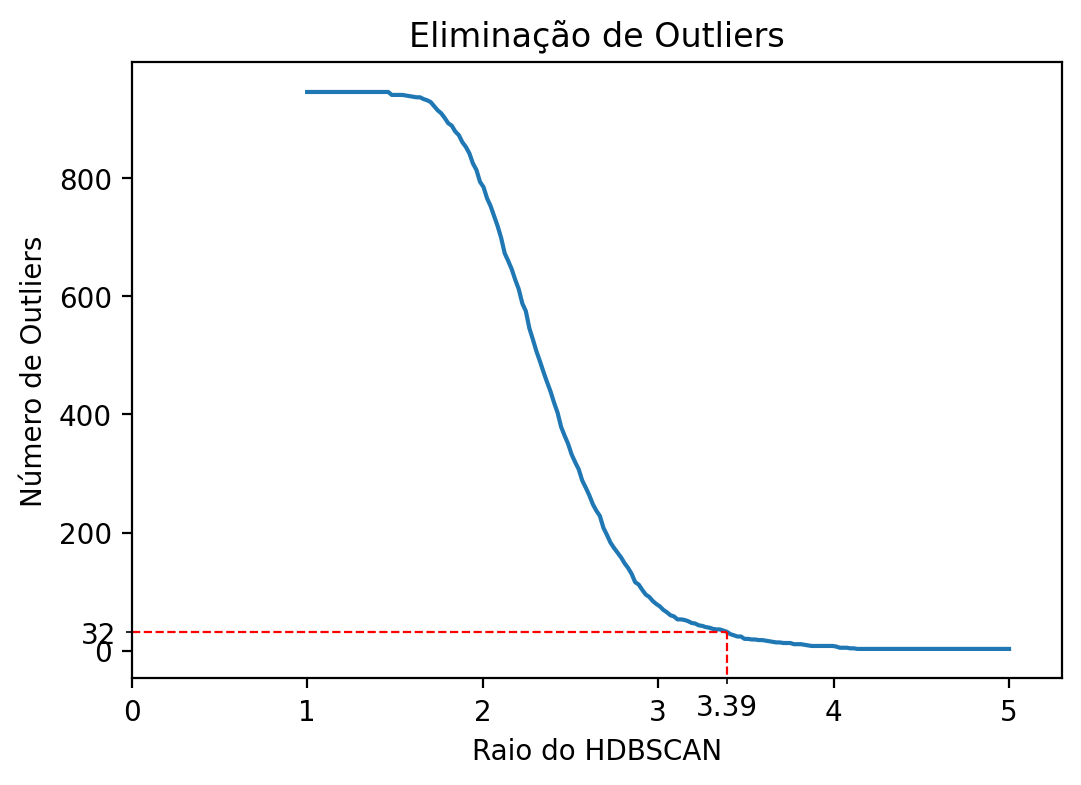

In [ ]:
hdbscan = HDBSCAN()
hdbscan.fit(df_norm_0)

def outliers_at(n):
    l, c = np.unique(hdbscan.dbscan_clustering(n), return_counts=True)
    return 0 if -1 not in l else c[list(l).index(-1)]

num_outliers_desejado = 32

x = np.linspace(1, 5, 200)
y = [outliers_at(n) for n in x]

indice_encontrado = 0
while y[indice_encontrado] > num_outliers_desejado:
    indice_encontrado += 1

raio_encontrado = x[indice_encontrado]
num_outliers_encontrado = y[indice_encontrado]

fig, ax = plt.subplots(figsize=(6,4), dpi=200)
ax.axis([0.7, 5.3, min(y) - 50, max(y) + 50])
plt.plot(x, y)
plt.title("Eliminação de Outliers")
plt.xlabel("Raio do HDBSCAN")
plt.ylabel("Número de Outliers")
plt.hlines(y=num_outliers_encontrado, xmin=0, xmax=raio_encontrado, color='red', linestyle='--', linewidth=0.8)
plt.vlines(x=raio_encontrado, ymin=-100, ymax=num_outliers_encontrado, color='red', linestyle='--', linewidth=0.8)
plt.xticks([0, raio_encontrado], [0, "%.3g" % raio_encontrado], minor=True)
plt.yticks([0, num_outliers_encontrado], [0, "%.3g" % num_outliers_encontrado], minor=True)

### Normalização de Novo
(Eliminar os outliers muda a média e o desvio padrão do conjunto)

In [ ]:
df2_hdb = df2.copy()
df2_hdb['label'] = hdbscan.dbscan_clustering(raio_encontrado)
df3 = df2.drop(df2_hdb[df2_hdb['label'] == -1].index)

norm = [
    "Finances",
    "Shopping centres",
    "Branded clothing",
    "Entertainment spending",
    "Spending on gadgets",
    "Spending on healthy eating",
    "Age",
    "Height",
    "Weight",
    "Number of siblings",
    "Education",
]

not_norm = [
    "Gender",
    "Left - right handed",
    "Only child",
    "Village - town",
    "House - block of flats",
]

df_norm = pd.DataFrame(
    StandardScaler().fit_transform(df3[norm]),
    columns=df3[norm].columns,
).join(df3[not_norm].reset_index(drop=True), how="outer")

df_norm

,Finances,Shopping centres,Branded clothing,Entertainment spending,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings,Education,Gender,Left - right handed,Only child,Village - town,House - block of flats
0,-0.015369,0.561350,1.494660,-0.171122,-1.475247,-0.505485,-0.104186,-1.117246,-1.420244,-0.271893,1.026332,1,1,0,1,0
1,-0.015369,0.561350,-1.592615,0.678909,1.653235,-1.429511,-0.485090,-1.117246,-0.619391,0.822865,1.026332,1,1,0,0,0
2,-0.893344,0.561350,-1.592615,0.678909,0.871114,-1.429511,-0.104186,0.279694,0.101377,0.822865,-0.382178,1,1,0,0,0
3,-0.893344,0.561350,-0.048978,-0.171122,0.871114,-2.353538,0.657623,-0.150134,-0.539305,-0.271893,1.026332,1,1,1,0,1
4,0.862605,-0.202153,0.722841,-0.171122,-0.693126,0.418542,-0.104186,-0.365048,-0.539305,-0.271893,-0.382178,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
909,0.862605,-0.202153,-0.048978,0.678909,0.871114,-1.429511,0.657623,0.172237,-0.459220,-0.271893,-0.382178,0,1,0,0,0
910,-0.015369,1.324852,0.722841,-0.171122,0.088994,0.418542,-0.104186,-1.009789,-0.699476,-0.271893,-0.382178,1,1,0,0,1
911,-1.771319,-0.965655,1.494660,-1.021154,-0.693126,1.342568,-0.865995,-0.042677,0.742060,-1.366651,-0.382178,1,1,1,0,0
912,-0.015369,-0.965655,-1.592615,1.528941,0.088994,-0.505485,1.800336,-0.042677,-0.619391,-0.271893,1.026332,1,1,0,0,0


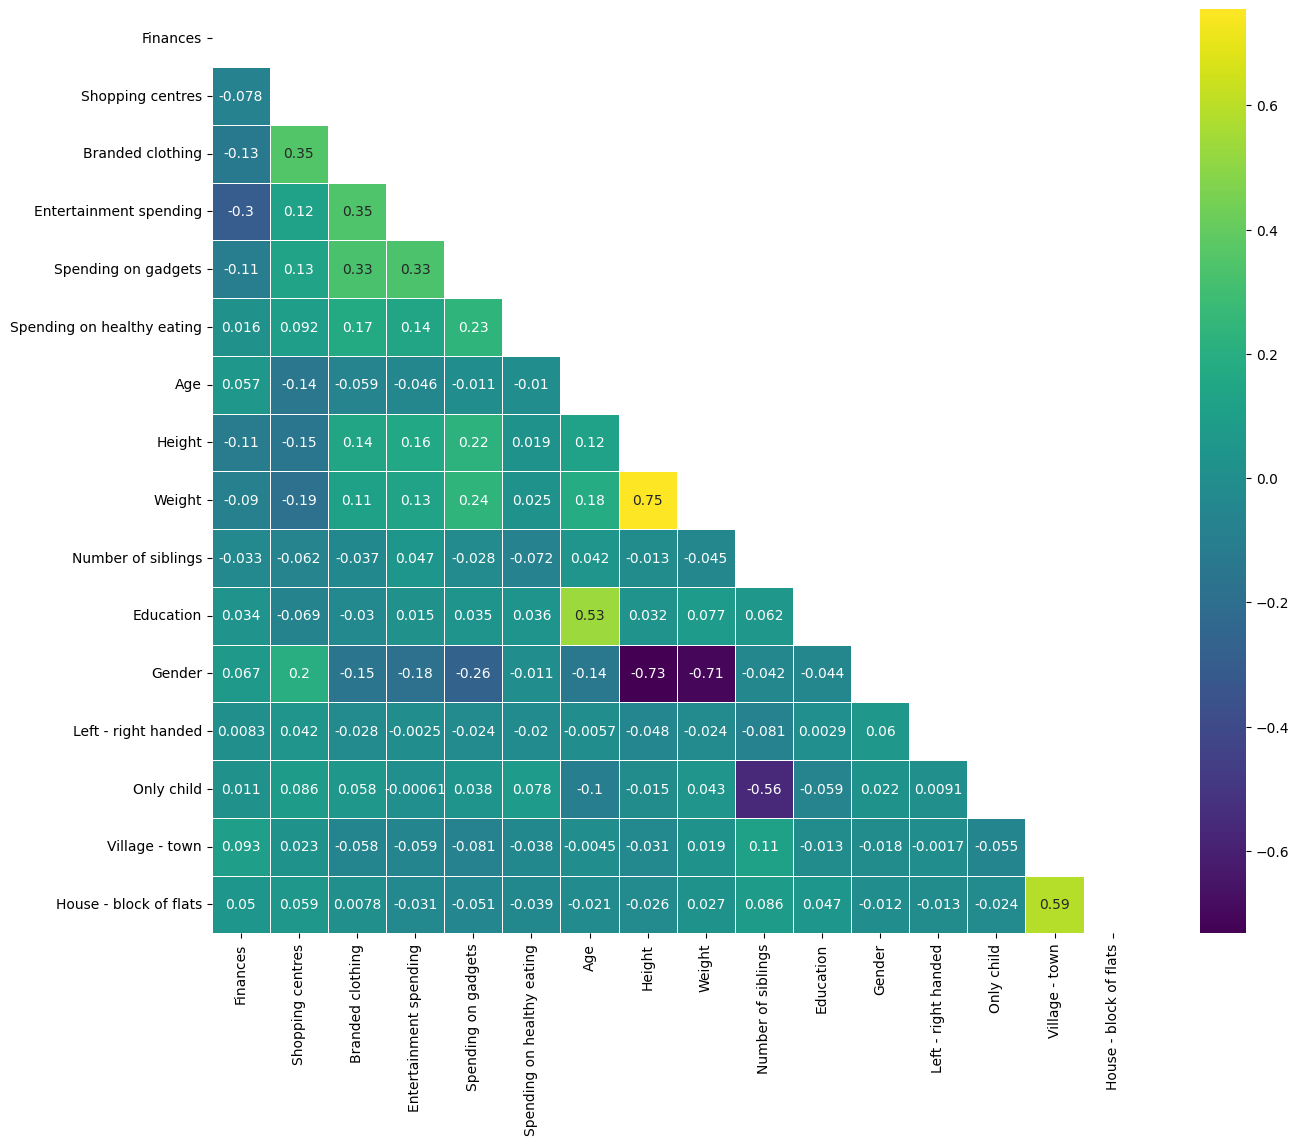

In [ ]:
mask = np.zeros_like(df_norm.corr())
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(15,12))
plt.title('')
sns.heatmap(df_norm.corr(method="spearman"), annot=True, mask=mask, linewidths=0.5, cmap='viridis')
plt.show()

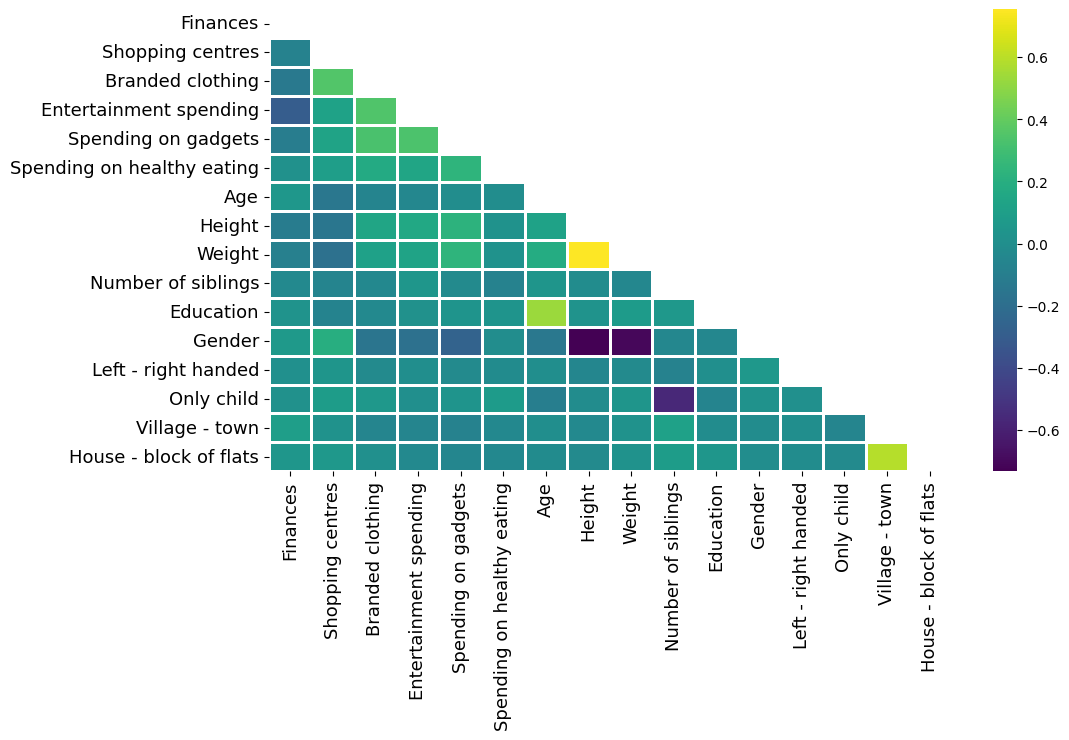

In [ ]:
plt.figure(figsize=(11,6))
plt.title('')
b = sns.heatmap(df_norm.corr(method="spearman"), annot=False, mask=mask, linewidths=1, cmap='viridis', annot_kws={"fontsize":11}, fmt=".2g")
b.tick_params(labelsize=13)
plt.show()

In [ ]:
df_norm = df_norm.drop(columns=['Height', 'Weight', 'Left - right handed', 'Only child', 'House - block of flats'])
df_norm

,Finances,Shopping centres,Branded clothing,Entertainment spending,Spending on gadgets,Spending on healthy eating,Age,Number of siblings,Education,Gender,Village - town
0,-0.015369,0.561350,1.494660,-0.171122,-1.475247,-0.505485,-0.104186,-0.271893,1.026332,1,1
1,-0.015369,0.561350,-1.592615,0.678909,1.653235,-1.429511,-0.485090,0.822865,1.026332,1,0
2,-0.893344,0.561350,-1.592615,0.678909,0.871114,-1.429511,-0.104186,0.822865,-0.382178,1,0
3,-0.893344,0.561350,-0.048978,-0.171122,0.871114,-2.353538,0.657623,-0.271893,1.026332,1,0
4,0.862605,-0.202153,0.722841,-0.171122,-0.693126,0.418542,-0.104186,-0.271893,-0.382178,1,1
...,...,...,...,...,...,...,...,...,...,...,...
909,0.862605,-0.202153,-0.048978,0.678909,0.871114,-1.429511,0.657623,-0.271893,-0.382178,0,0
910,-0.015369,1.324852,0.722841,-0.171122,0.088994,0.418542,-0.104186,-0.271893,-0.382178,1,0
911,-1.771319,-0.965655,1.494660,-1.021154,-0.693126,1.342568,-0.865995,-1.366651,-0.382178,1,0
912,-0.015369,-0.965655,-1.592615,1.528941,0.088994,-0.505485,1.800336,-0.271893,1.026332,1,0


###K-Modes

In [ ]:
from sklearn.utils.extmath import weighted_mode
custos = []
for num_clusters in list(range(2,11)):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
    kmode.fit_predict(df_norm)
    custos.append(kmode.cost_)

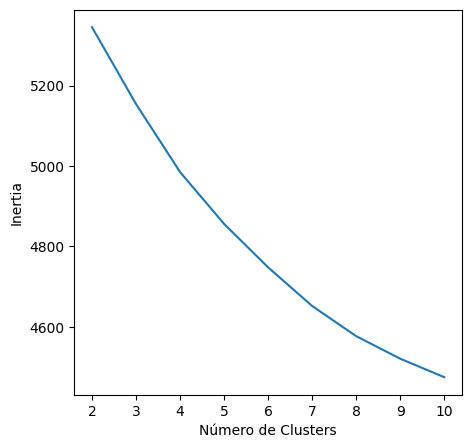

In [ ]:
k = KneeLocator(list(range(2,11)), custos, curve='convex', direction='decreasing')
cotovelo = k.knee

plt.figure(figsize = (5,5))
plt.plot(list(range(2,11)),custos)
plt.xticks(list(range(2,11)))
plt.xlabel('Número de Clusters')
plt.ylabel('Inertia')
plt.show()

In [ ]:
k.knee

5

In [ ]:
kmode = KModes(n_clusters= 5, init='Huang', n_init=1, verbose=1)
kmode.fit_predict(df_norm)
df_norm['cluster_labels'] = kmode.labels_

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 262, cost: 4761.0


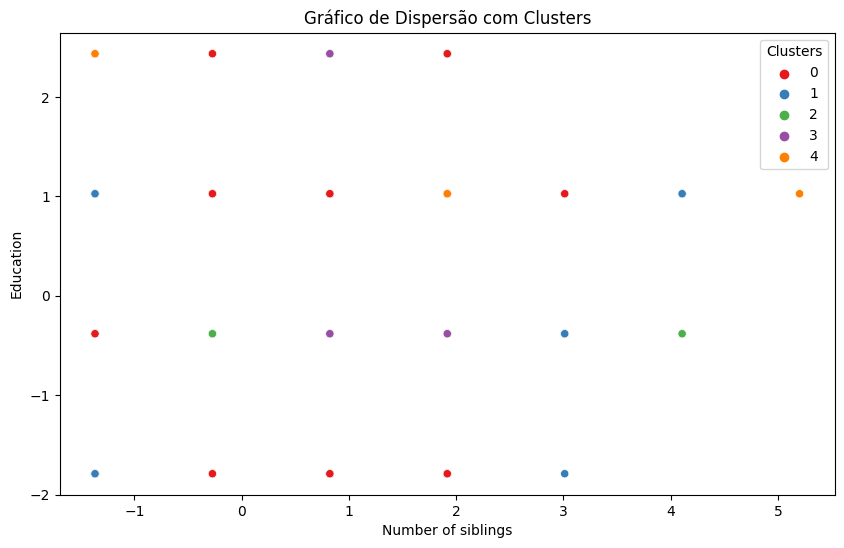

In [ ]:
data_to_plot = df_norm[['Number of siblings', 'Education', 'cluster_labels']]

cluster_colors = sns.color_palette("Set1", n_colors=data_to_plot['cluster_labels'].nunique())

plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_to_plot, x='Number of siblings', y='Education', hue='cluster_labels', palette=cluster_colors)
plt.title('Gráfico de Dispersão com Clusters')
plt.xlabel('Number of siblings')
plt.ylabel('Education')
plt.legend(title='Clusters')
plt.show()

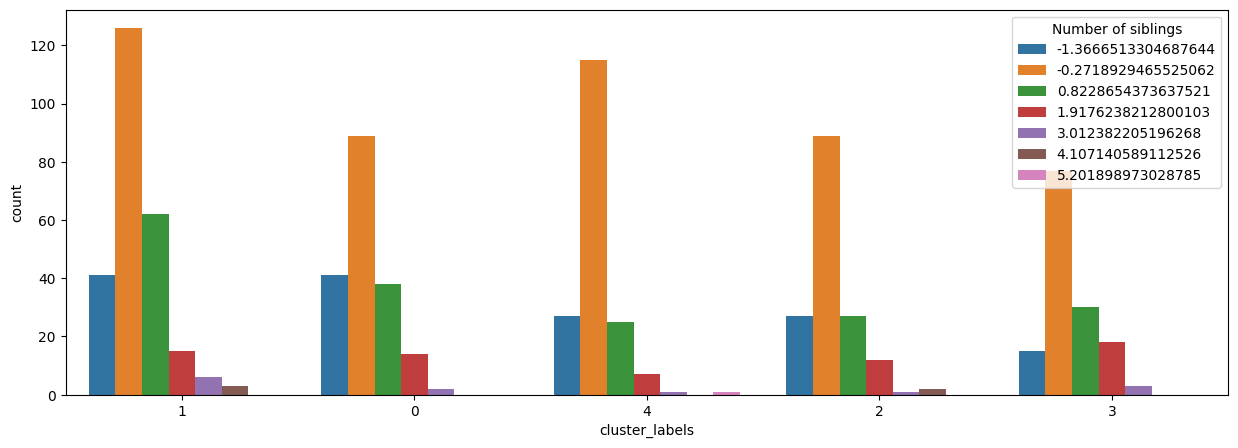

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot(x=df_norm['cluster_labels'],order=df_norm['cluster_labels'].value_counts().index,hue=df_norm['Number of siblings'])
plt.show()

KeyError: ignored

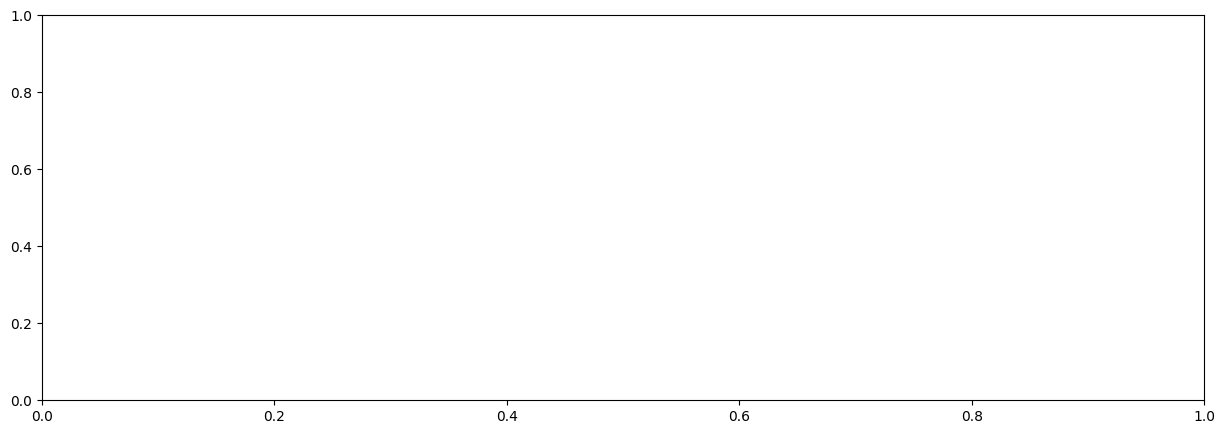

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot(x=df_norm['cluster_labels'],order=df_norm['cluster_labels'].value_counts().index,hue=df_norm['Spending on looks'])
plt.show()

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot(x=df_norm['cluster_labels'],order=df_norm['cluster_labels'].value_counts().index,hue=df_norm['Education'])
plt.show()

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot(x=df_norm['cluster_labels'],order=df_norm['cluster_labels'].value_counts().index,hue=df_norm['Village - town'])
plt.show()

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot(x=df_norm['cluster_labels'],order=df_norm['cluster_labels'].value_counts().index,hue=df_norm['Branded clothing'])
plt.show()

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot(x=df_norm['cluster_labels'],order=df_norm['cluster_labels'].value_counts().index,hue=df_norm['Age'])
plt.show()

###K-Means


In [ ]:
clusters = []
inertia = []
for i in range(1,11):
  kmeans =  KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
  kmeans.fit(df_norm)
  clusters.append(i)
  inertia.append(kmeans.inertia_)

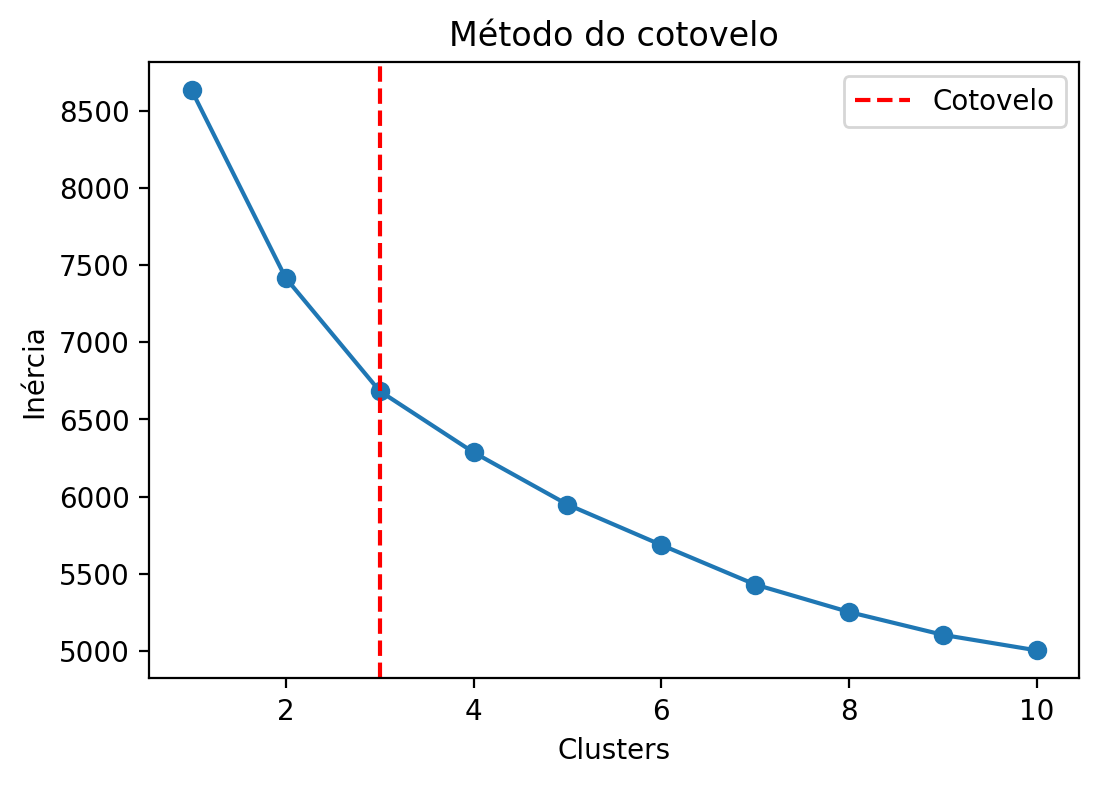

In [ ]:
cotovelo = 3
plt.figure(figsize=(6,4), dpi=200)
plt.plot(range(1,11), inertia, marker='o')
plt.xlabel('Clusters')
plt.ylabel('Inércia')
plt.title('Método do cotovelo')
plt.axvline(x=cotovelo, color='r', linestyle='--', label='Cotovelo')
plt.legend()
plt.show()

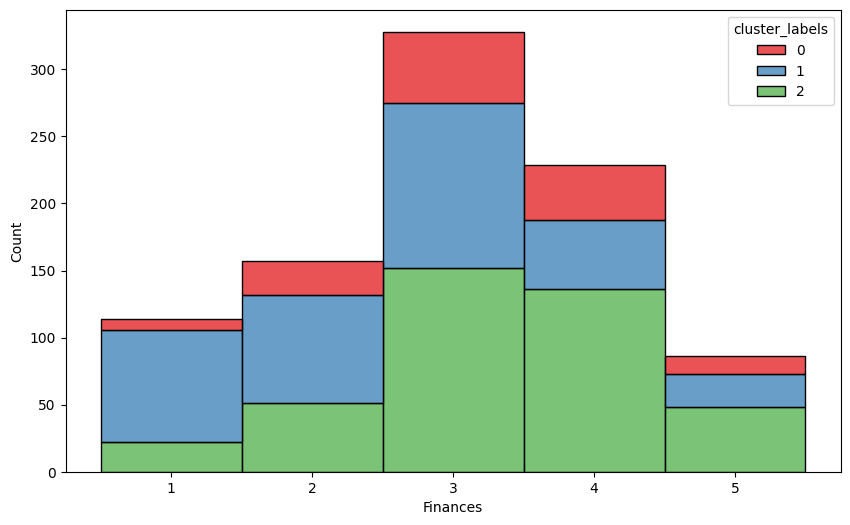

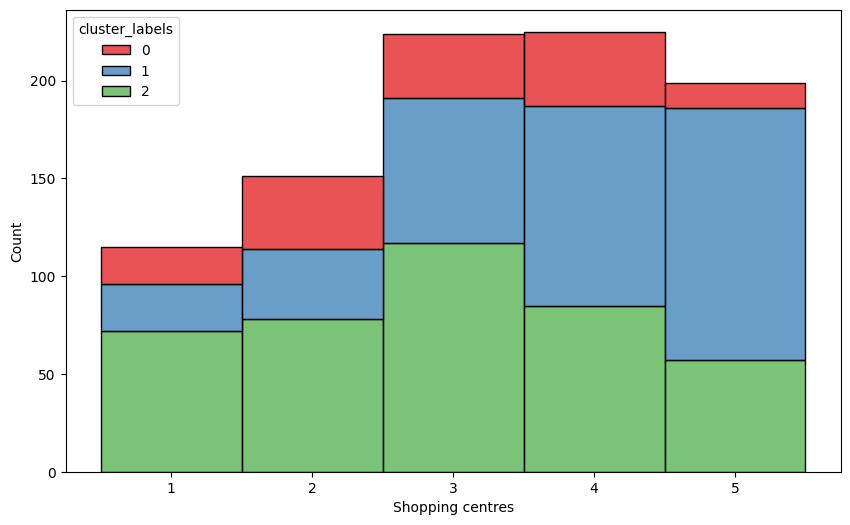

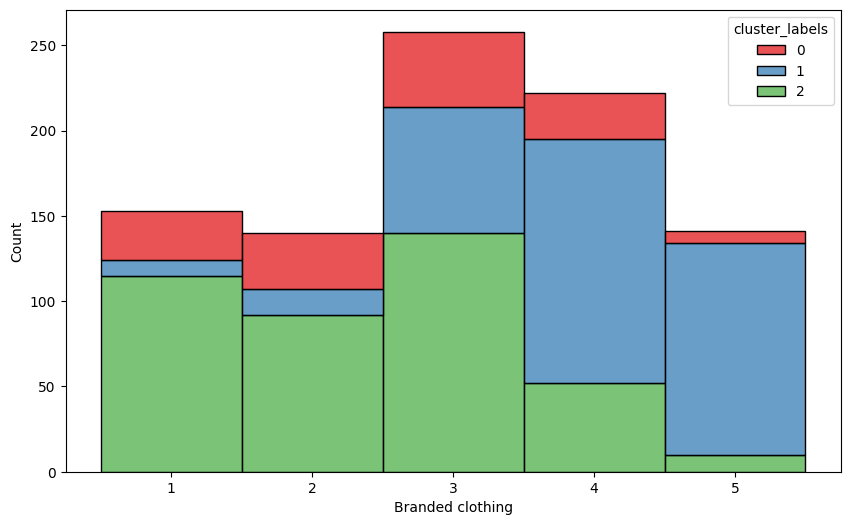

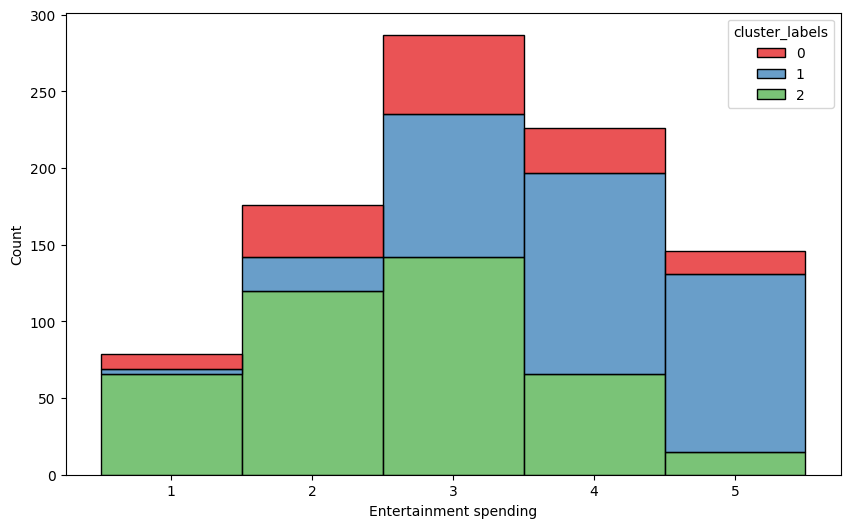

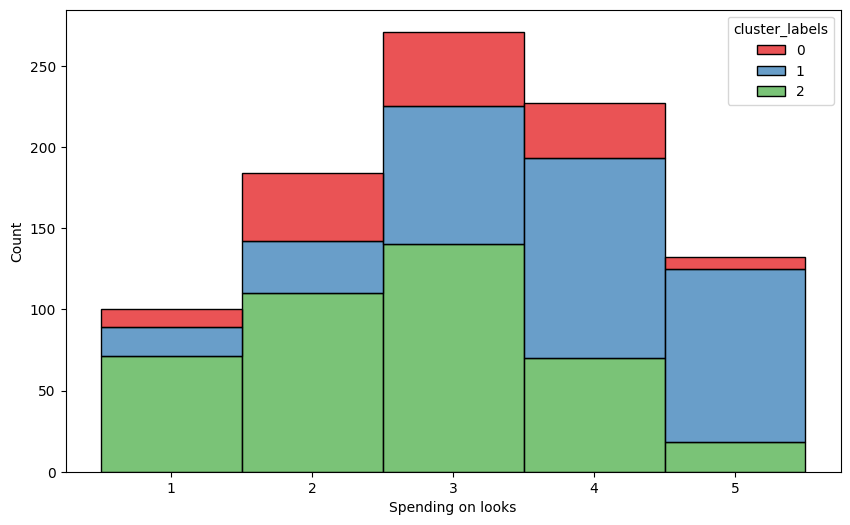

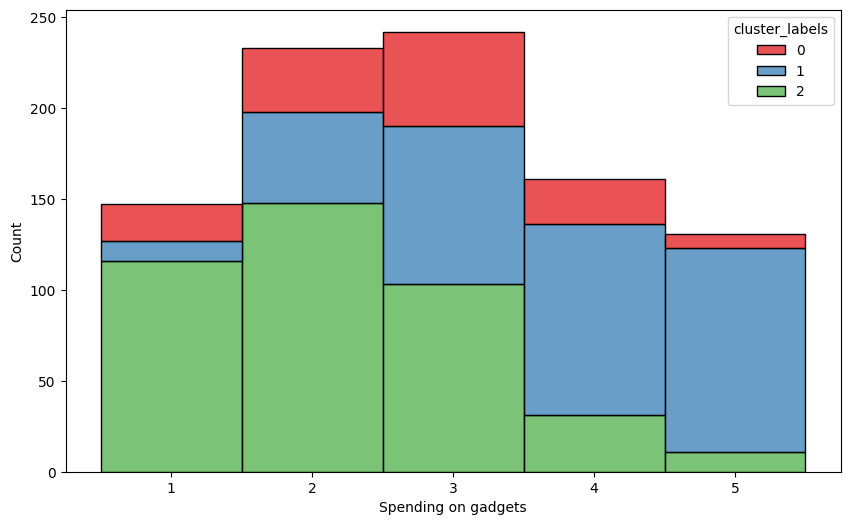

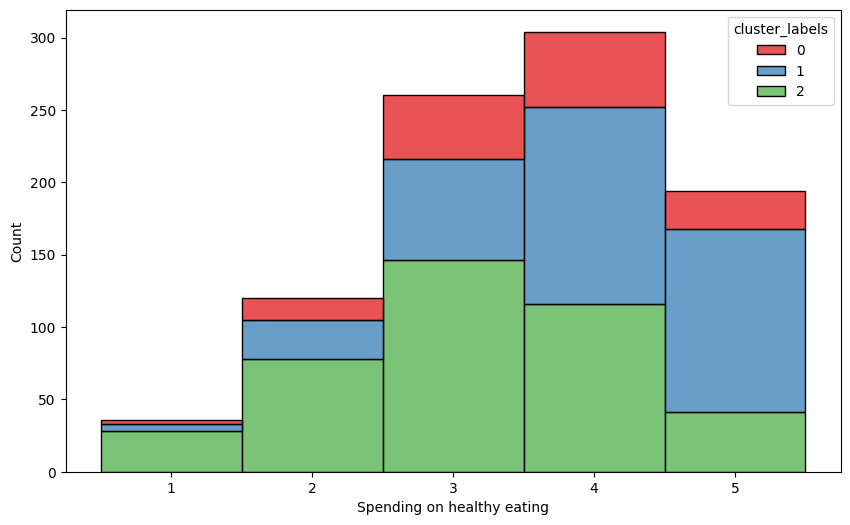

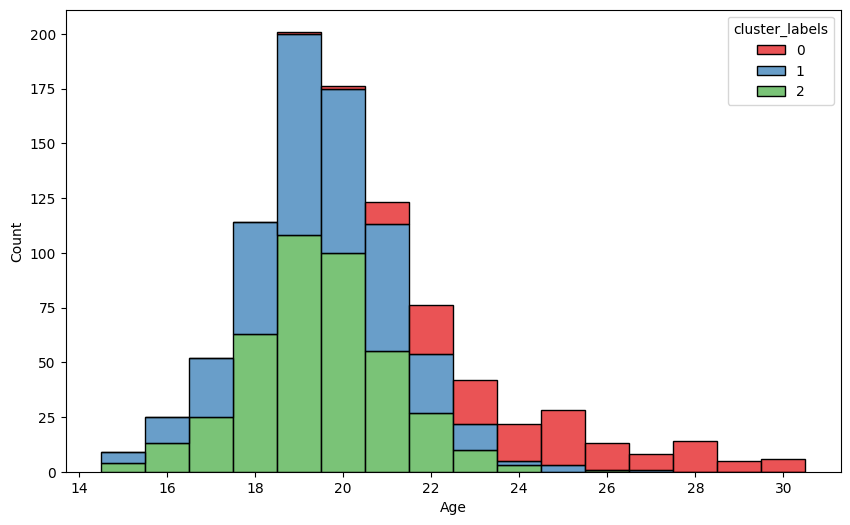

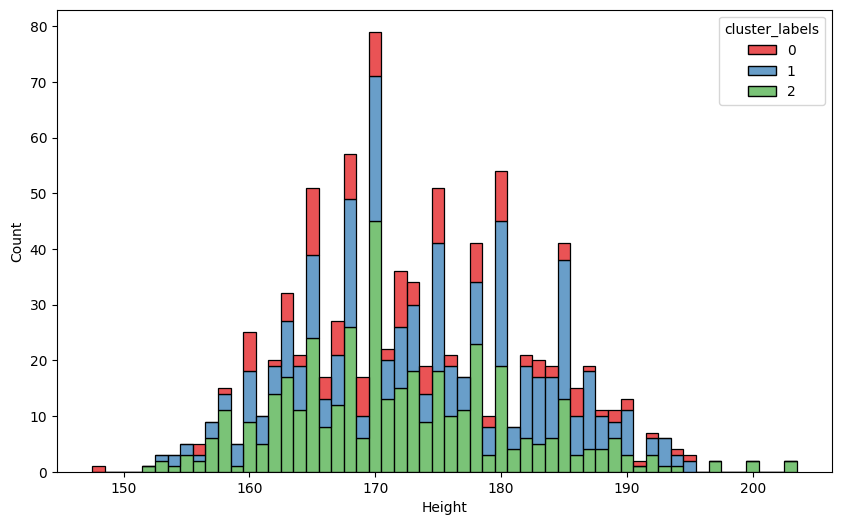

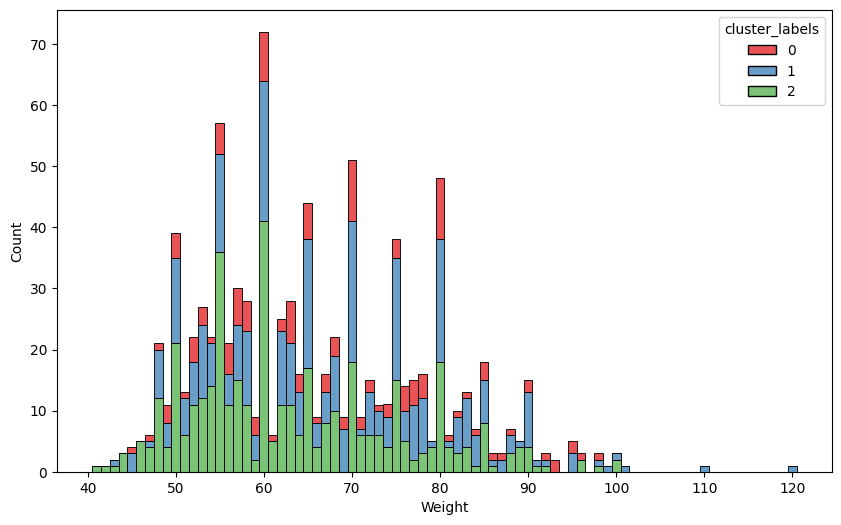

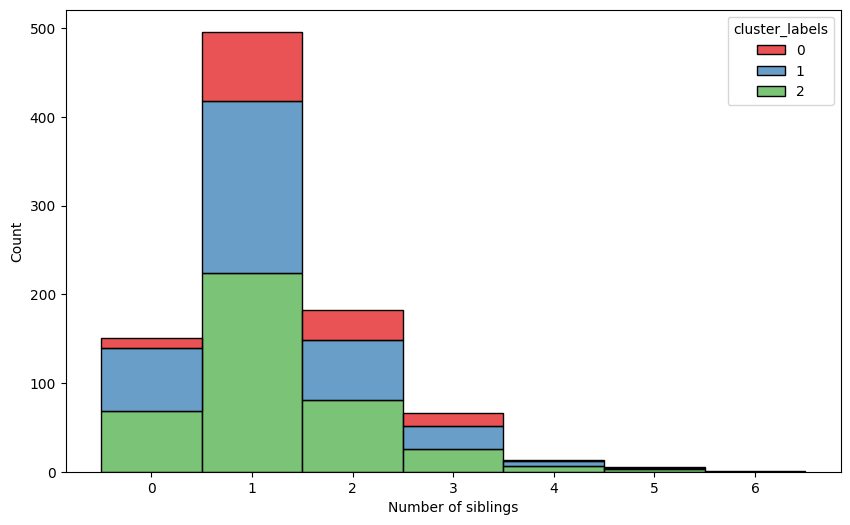

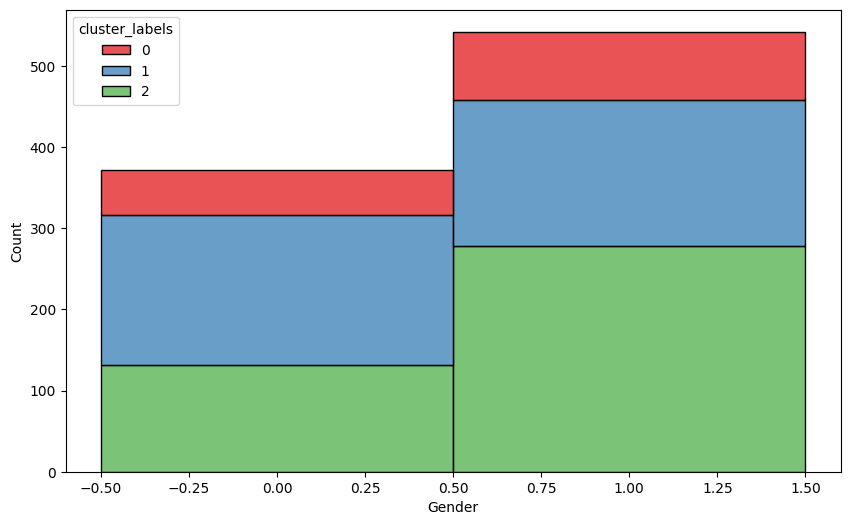

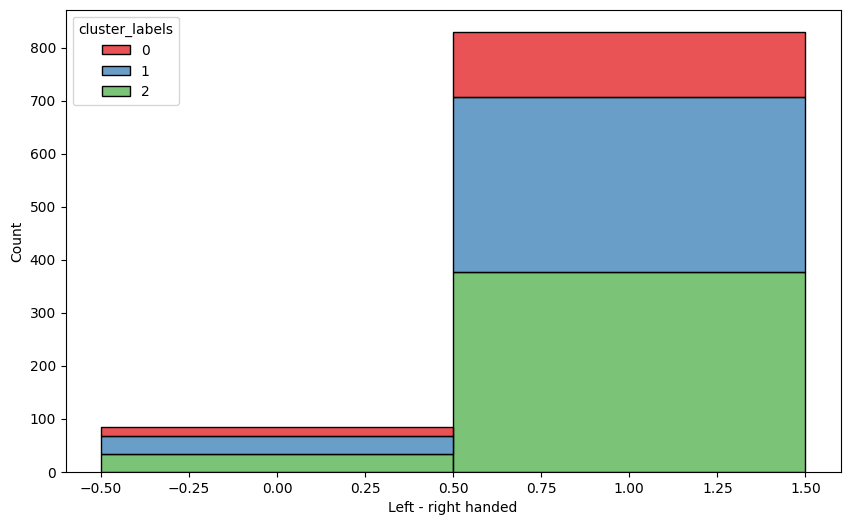

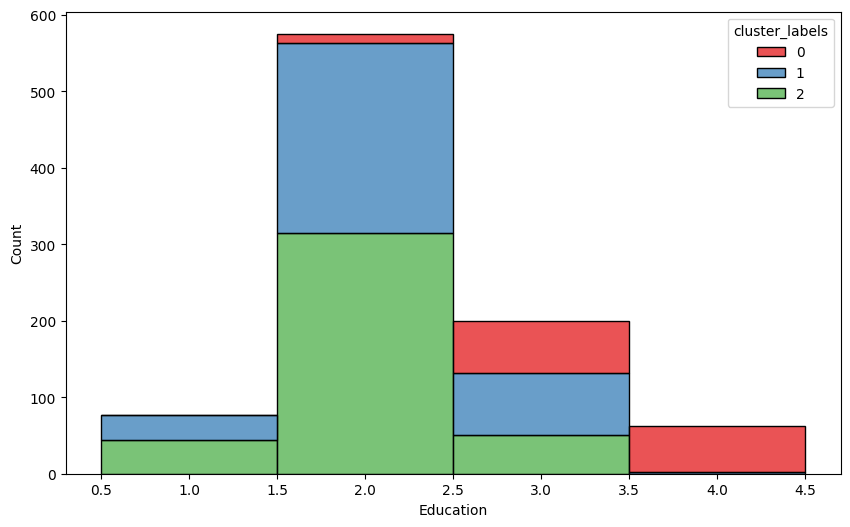

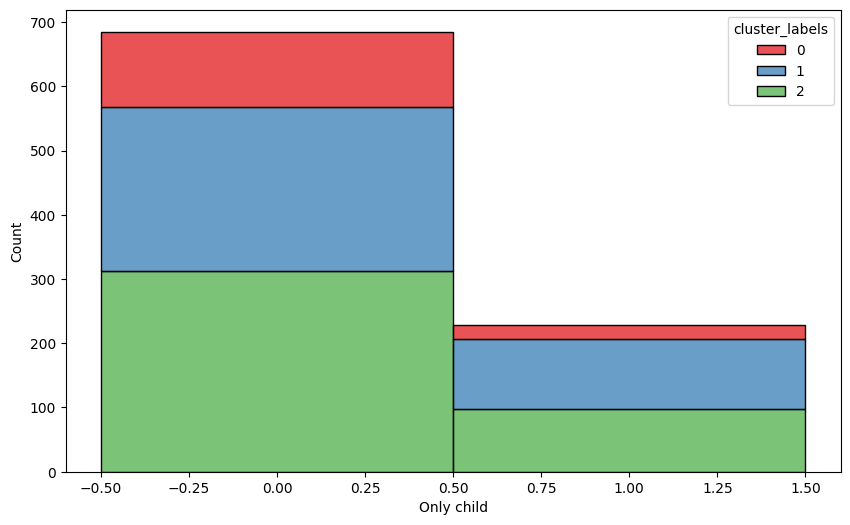

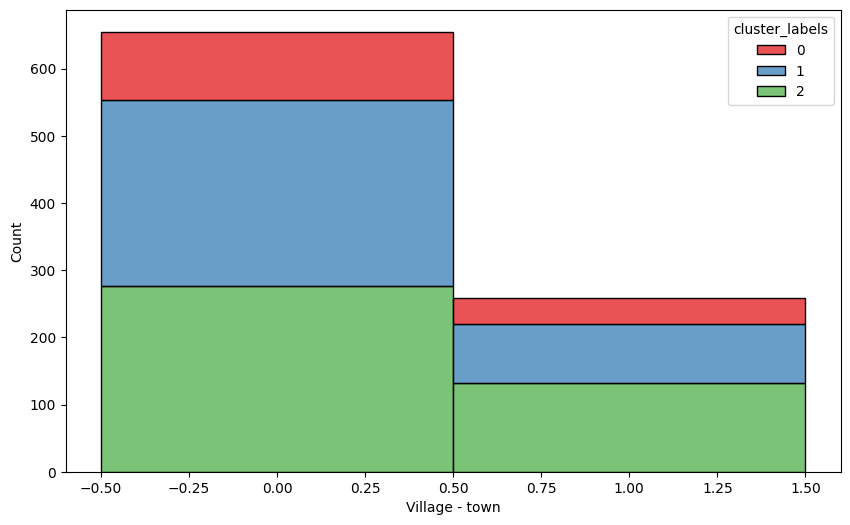

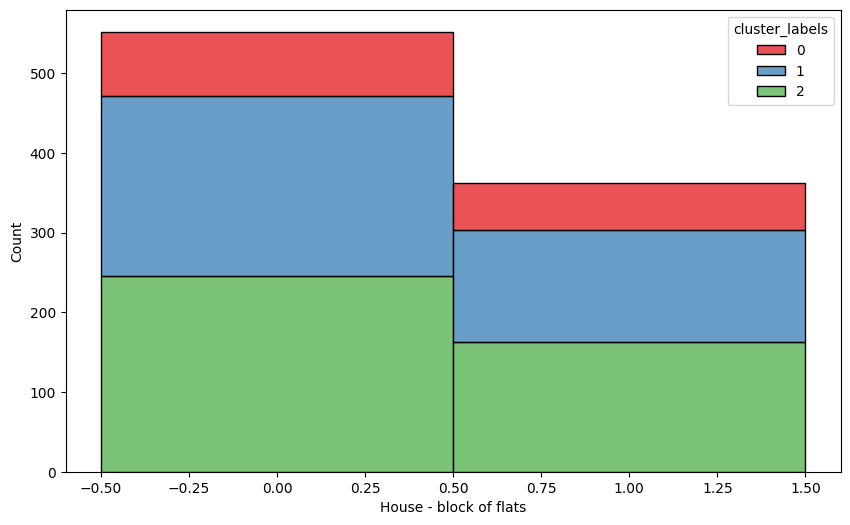

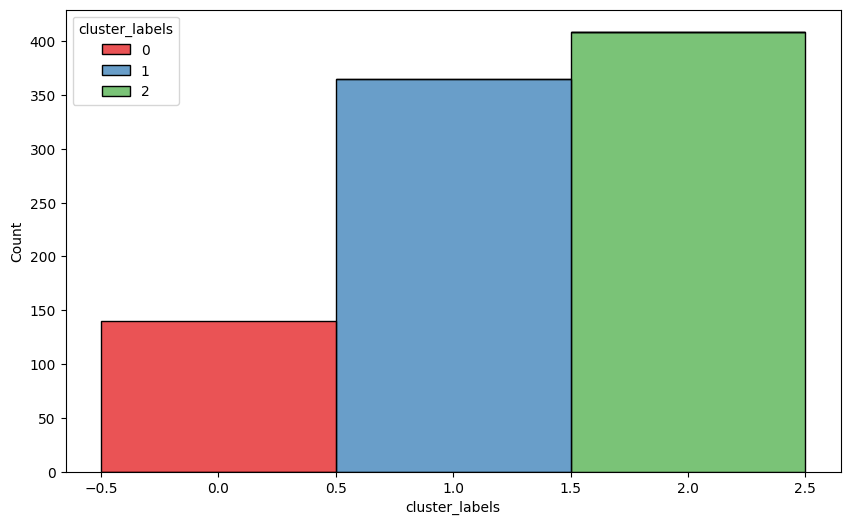

In [ ]:
kmeans = KMeans(n_clusters= 3, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit_predict(df_norm)

df_kmeans = df3.copy()
df_kmeans['cluster_labels'] = kmeans.labels_

for col in df_kmeans.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df_kmeans, hue='cluster_labels', x=col, palette='Set1', multiple='stack', discrete=True)


In [ ]:
##  verificar !!
#plt.subplots(figsize = (10,6))
# sns.countplot(
#     x=df_kmeans['cluster_labels'],
#     order=df_kmeans['cluster_labels'].value_counts().index,
#     hue=df_kmeans['Education'],
# )
## sns.histplot(data=df_kmeans, hue='cluster_labels', x='Education', palette='Set1', multiple='stack', discrete=True)
#plt.show()

###Validação

In [ ]:
kmeans = KMeans(n_clusters=3, init='k-means++')
y_kmeans = kmeans.fit_predict(df_norm)

score = silhouette_score(df_norm, kmeans.labels_, metric='euclidean')
score

NameError: ignored

In [ ]:
score1 = davies_bouldin_score(df_norm, kmeans.labels_)
score1

2.0960309474232806

###Agrupamento hierárquico

#### Aglomerativo de Ligação Média

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Resultados: Silhouette: 0.15118657076043548 // Davies-Bouldin: 1.7812611436130705


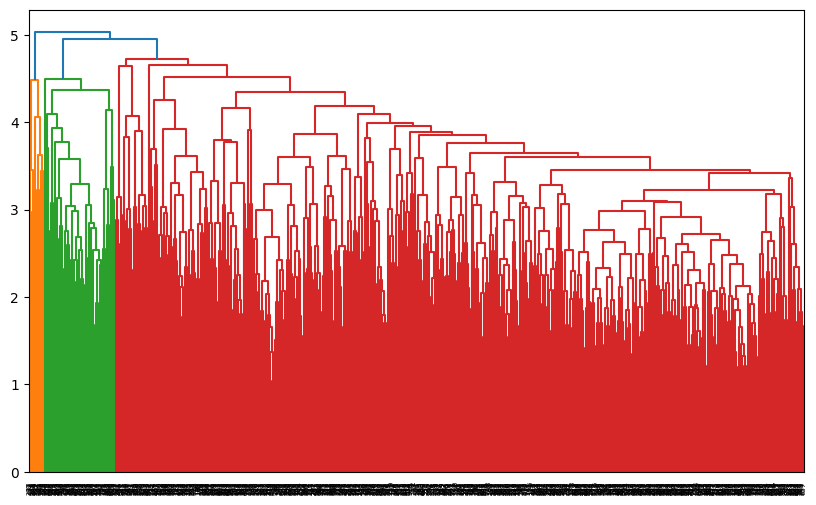

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

ag_avg = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average')
ag_avg.fit(df_norm)
score1 = silhouette_score(df_norm, ag_avg.labels_,  metric='euclidean')
score2 = davies_bouldin_score(df_norm, ag_avg.labels_)
print(f'Resultados: Silhouette: {score1} // Davies-Bouldin: {score2}')

df_ag_avg = df3.copy()
df_ag_avg['labels'] = ag_avg.labels_

plt.figure(figsize=(10, 6))
dendrogram(linkage(df_norm, method='average', metric='euclidean'), color_threshold=4.8)
plt.savefig("dendrogram-agglomerative-average-link.pdf", format='pdf')
plt.show()

#### Aglomerativo de Ligação Simples

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Resultados: Silhouette: 0.15579543619398478 // Davies-Bouldin: 0.6212796299562641


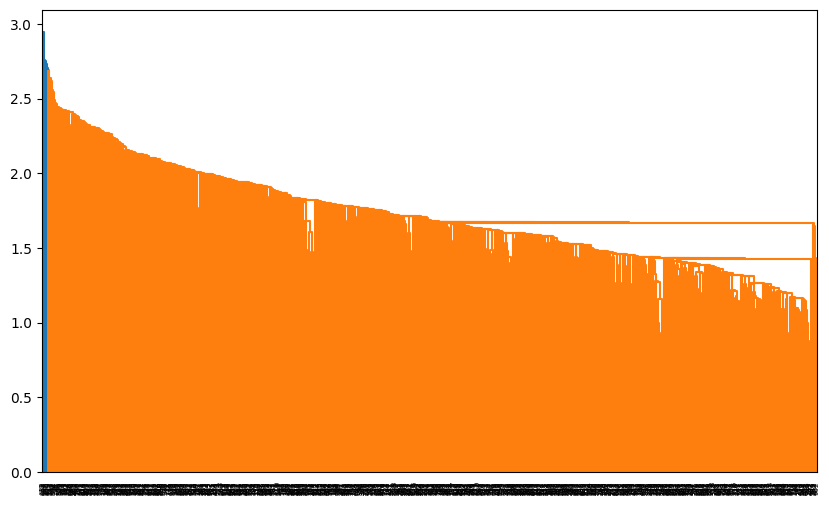

In [ ]:
ag_sing = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='single')
ag_sing.fit(df_norm)
score1 = silhouette_score(df_norm, ag_sing.labels_,  metric='euclidean')
score2 = davies_bouldin_score(df_norm, ag_sing.labels_)
print(f'Resultados: Silhouette: {score1} // Davies-Bouldin: {score2}')

df_ag_sing = df3.copy()
df_ag_sing['labels'] = ag_sing.labels_

plt.figure(figsize=(10, 6))
dendrogram(linkage(df_norm, method='single', metric='euclidean'), color_threshold=2.7)
plt.savefig("dendrogram-single-average-link.pdf", format='pdf')
plt.show()

#### Aglomerativo de Ligação Completa

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Resultados: Silhouette: 0.09428359998196371 // Davies-Bouldin: 2.50887160262829


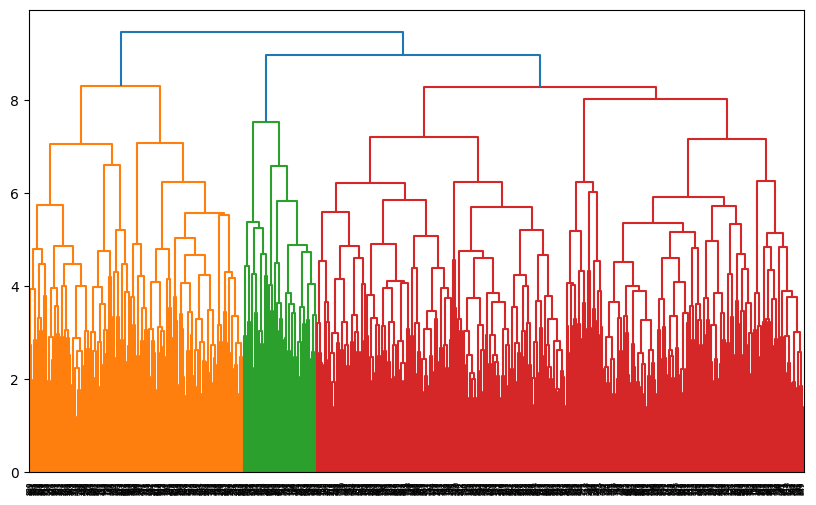

In [ ]:
ag_comp = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')
ag_comp.fit(df_norm)
score1 = silhouette_score(df_norm, ag_comp.labels_,  metric='euclidean')
score2 = davies_bouldin_score(df_norm, ag_comp.labels_)
print(f'Resultados: Silhouette: {score1} // Davies-Bouldin: {score2}')

df_ag_comp = df3.copy()
df_ag_comp['labels'] = ag_comp.labels_

plt.figure(figsize=(10, 6))
dendrogram(linkage(df_norm, method='complete', metric='euclidean'), color_threshold=8.5)
plt.savefig("dendrogram-complete-average-link.pdf", format='pdf')
plt.show()

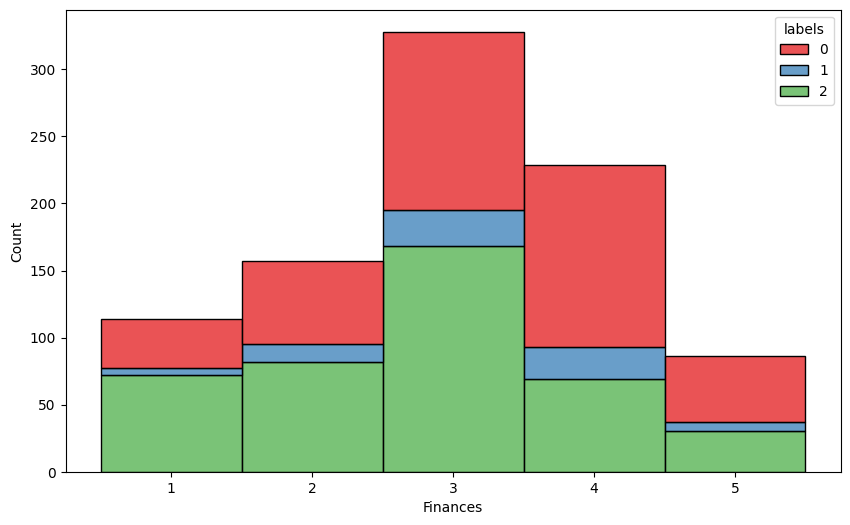

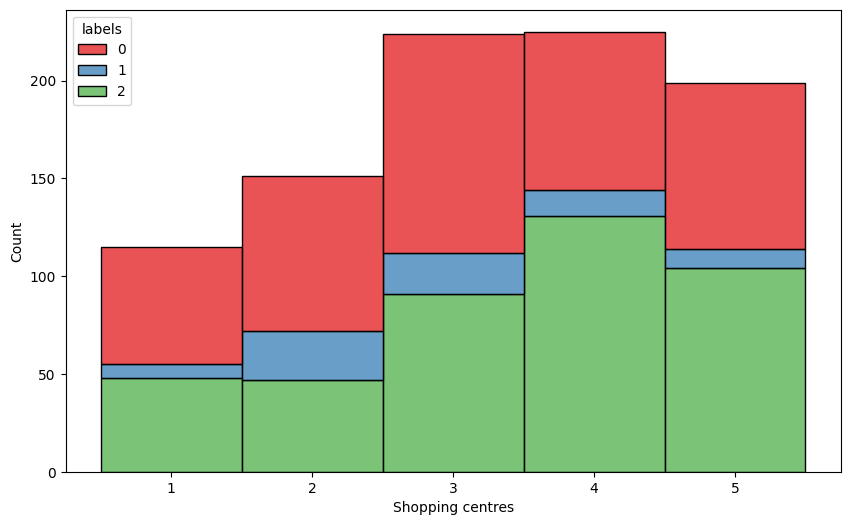

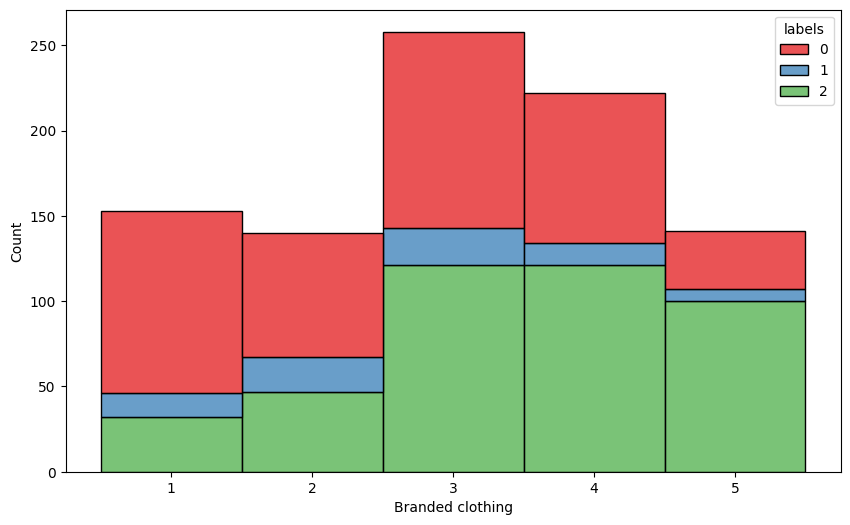

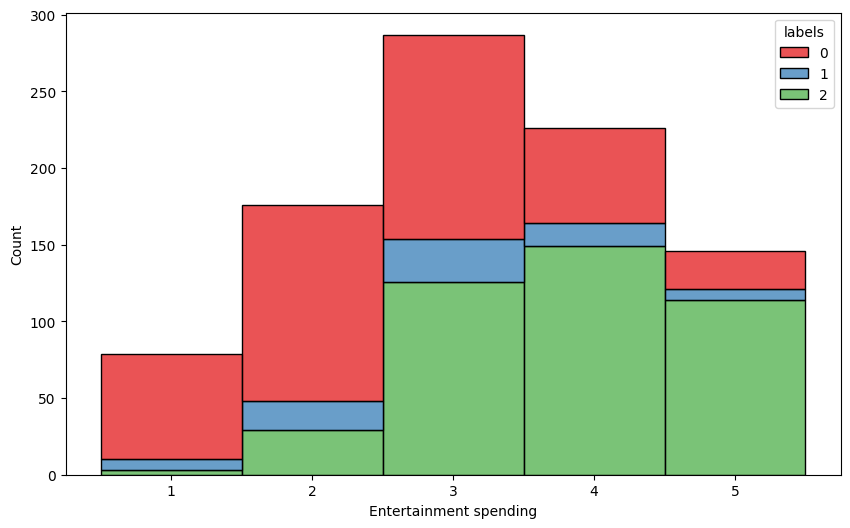

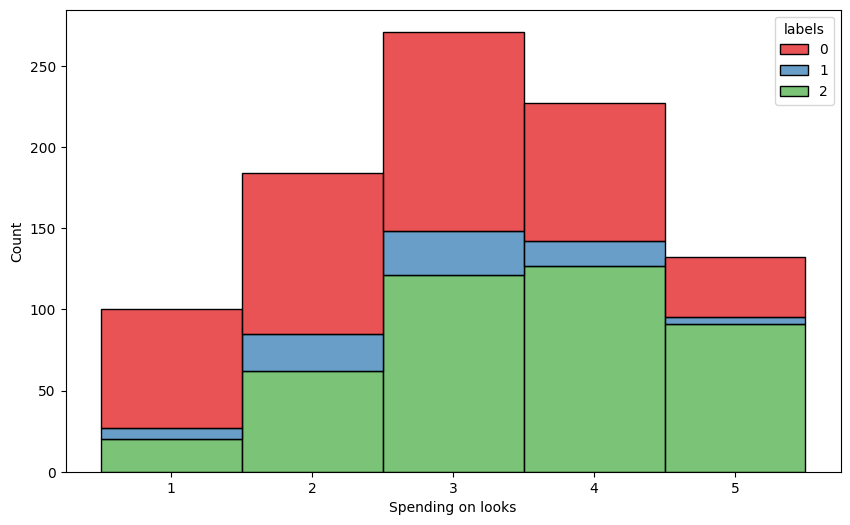

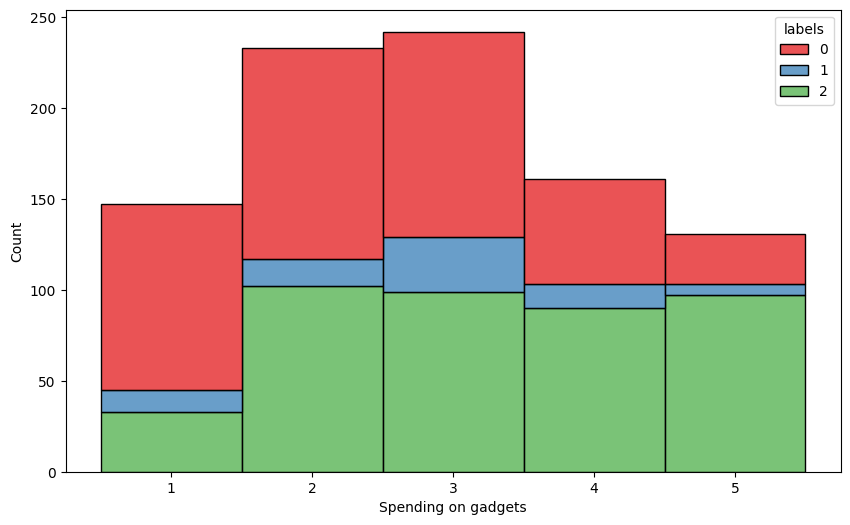

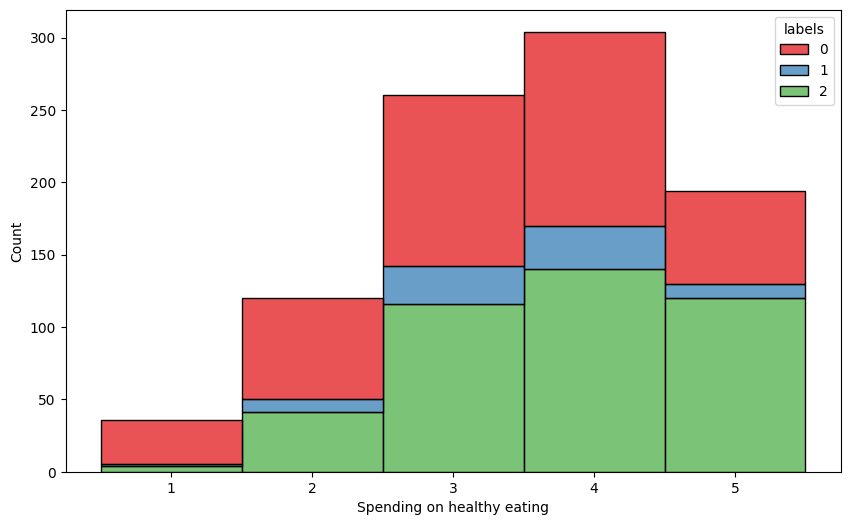

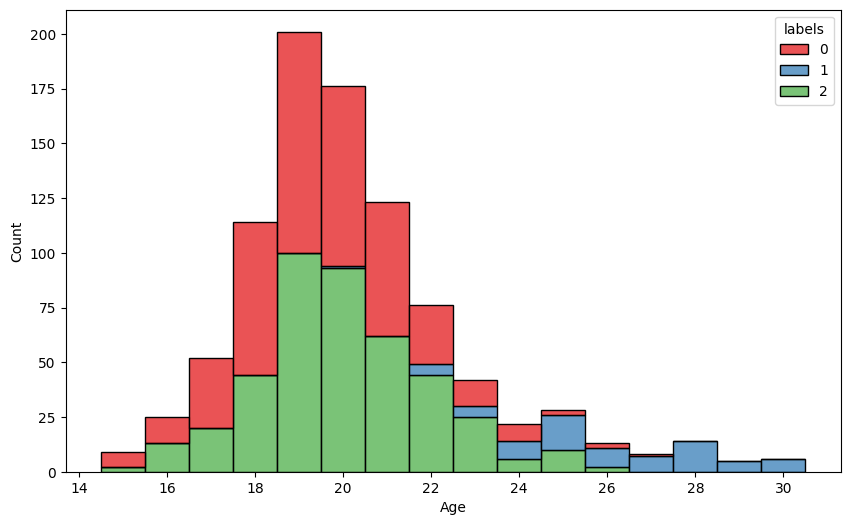

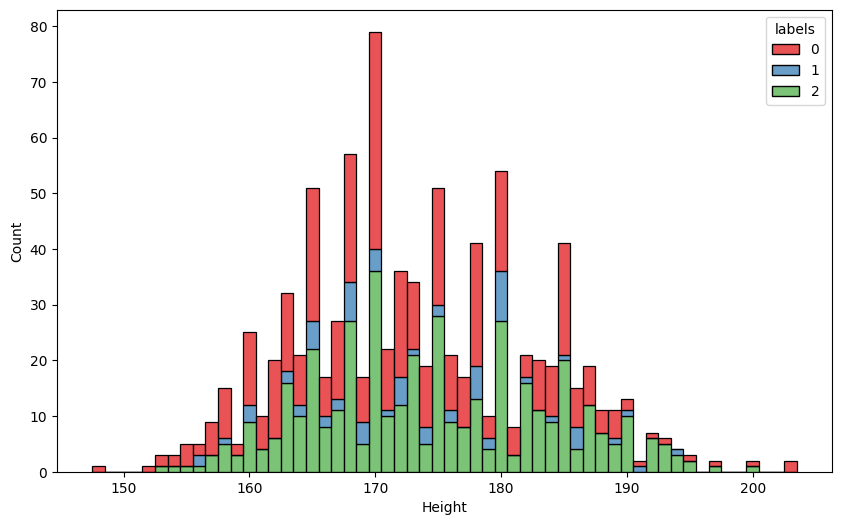

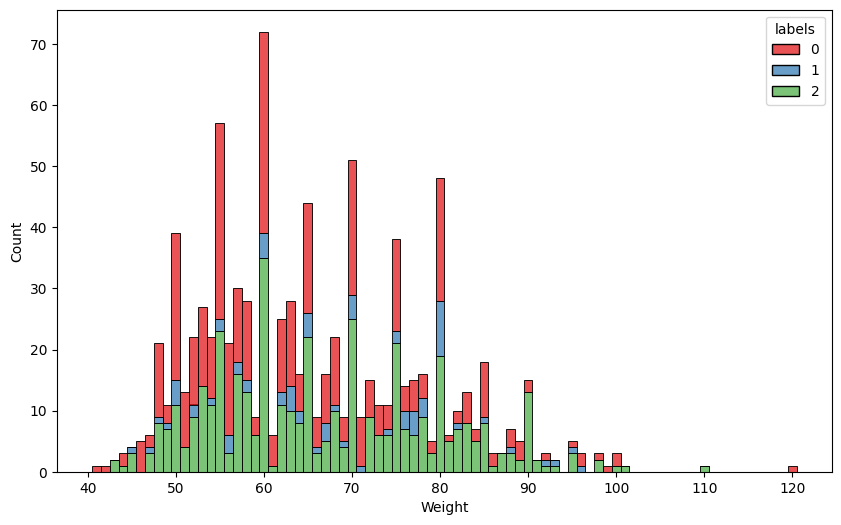

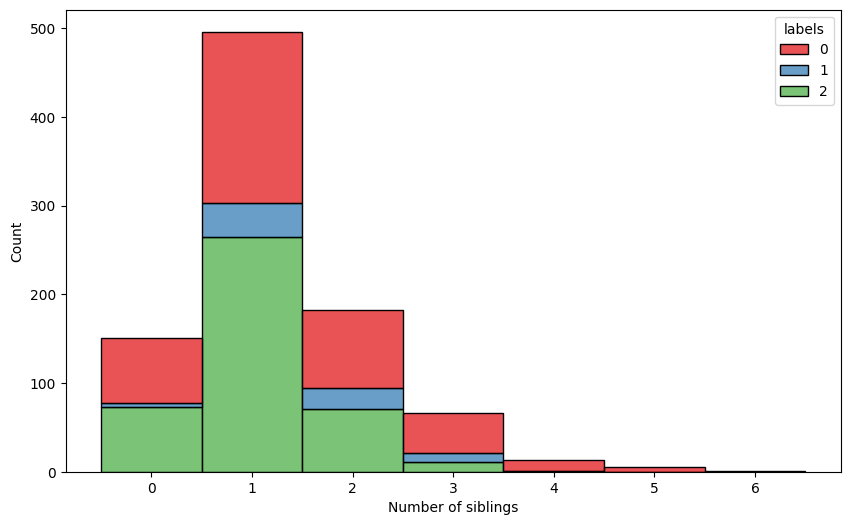

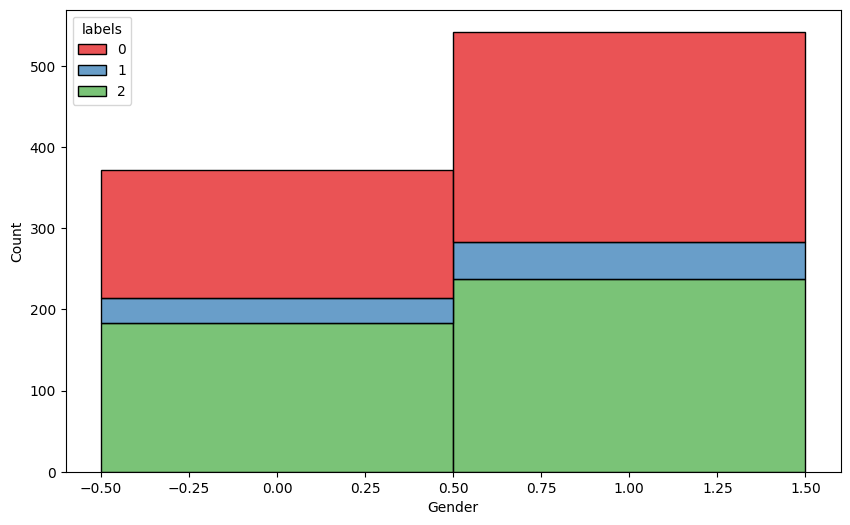

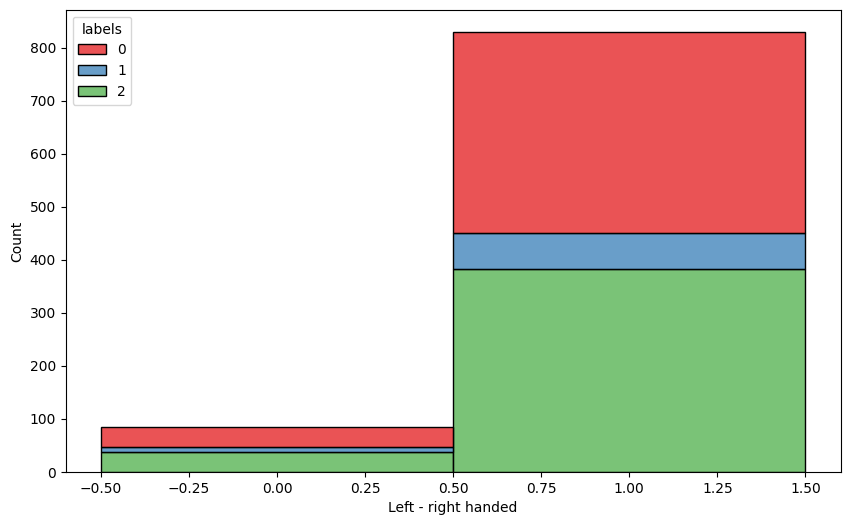

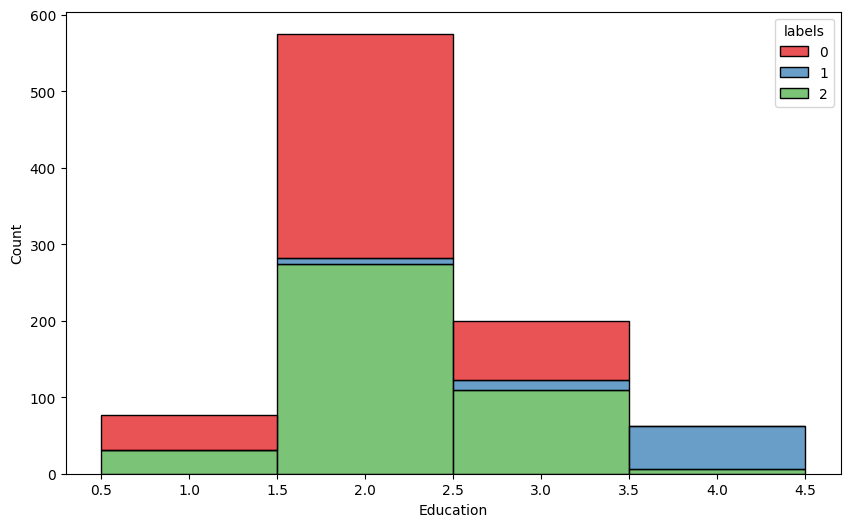

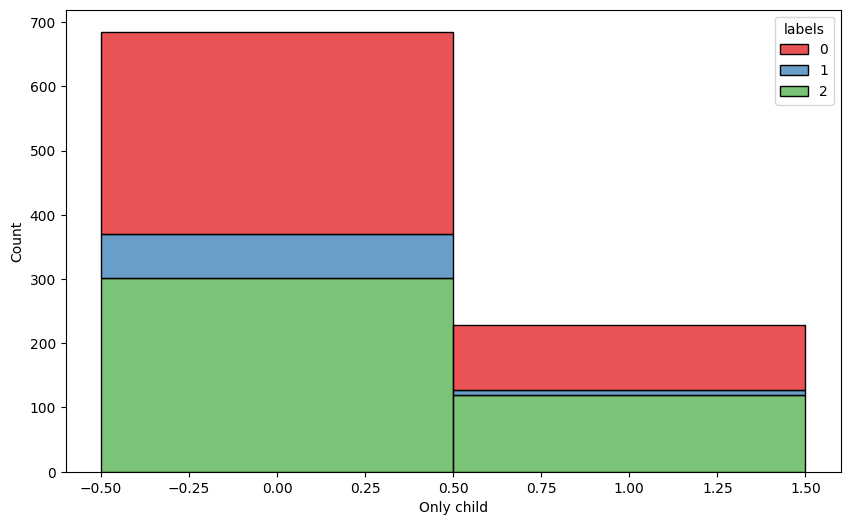

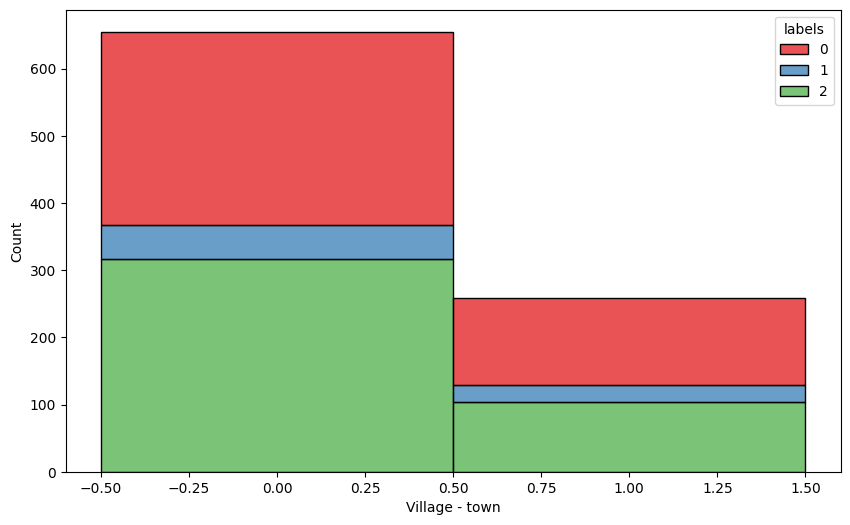

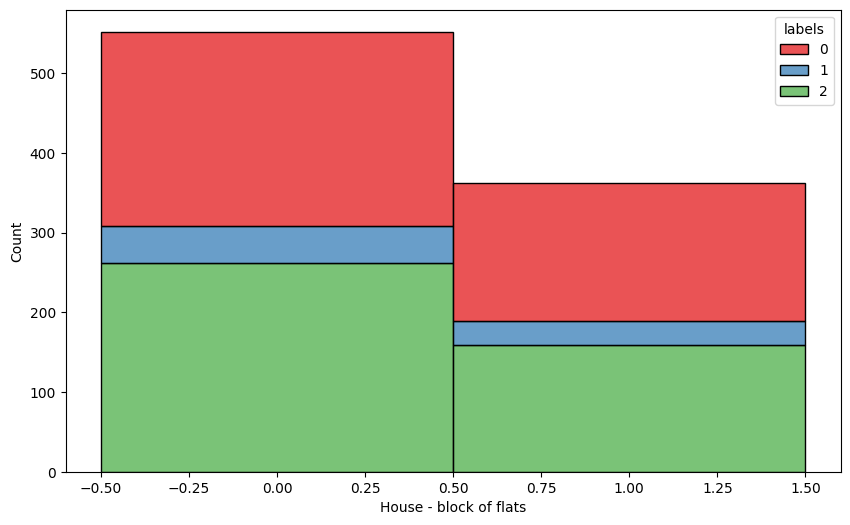

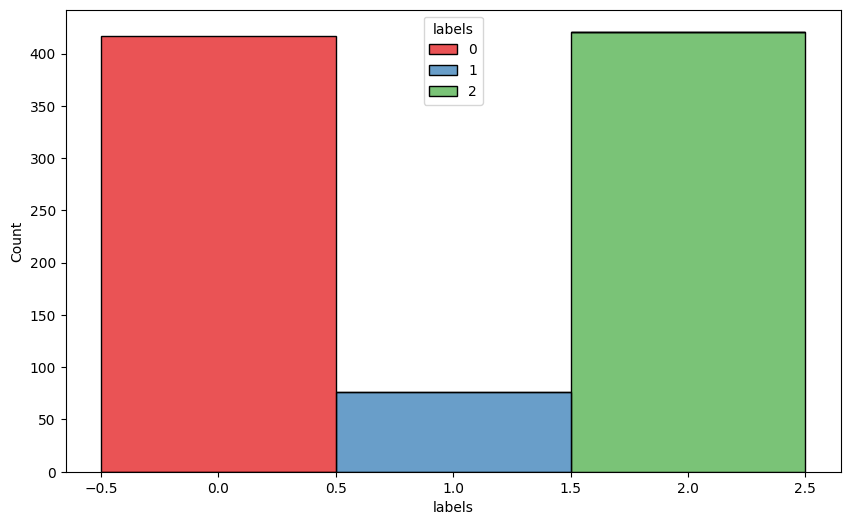

In [ ]:
!mkdir complete-average-link
for col in df_ag_comp.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df_ag_comp, hue='labels', x=col, palette='Set1', multiple='stack', discrete=True)
    plt.savefig(f"complete-average-link/{col.lower().replace('-', '').replace(' ', '_')}.pdf", format='pdf')


In [ ]:
adjusted_rand_score(kmeans.labels_, ag_comp.labels_)

0.06761745554435167